<a href="https://colab.research.google.com/github/dondees/Dev_Meetings_DS/blob/master/Copy_of_4_Dev_Meeting_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DevMeeting – Data Science
## 4. scikit-learn

![scikit-learn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/200px-Scikit_learn_logo_small.svg.png)

scikit-learn to biblioteka implementująca większość powszechnie używanych metod uczenia maszynowego. W niniejszym projekcie wykorzystamy __Drzewa decyzyjne__, dostępne w scikit-learnie, do zbudowania klasyfikatora.

W skład scikit-learn, poza metodami uczenia maszynowego, wchodzą algorytmy wstępnego przetwarzania danych (preprocessingu), wyboru modeli i wizualizacji.

In [0]:
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Drzewa decyzyjne
from sklearn.tree import DecisionTreeClassifier

# Miary jakości
from sklearn.metrics import precision_score

# Wizualizacja drzew decyzyjnych
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Przechowywanie modeli
import pickle

## 4.1 Podstawy Uczenia Maszynowego

## 4.2 Wstępne przetwarzanie danych

### Uzupełnianie brakujących danych

In [0]:
df = pd.DataFrame(
    {"pet": ["cat", "dog", "cat", "dog"],
     "age": [3, 7, 1, 2],
     "length": [40, np.nan, 46, 80]
    }
)

df

,pet,age,length
0,cat,3,40.0
1,dog,7,NaN
2,cat,1,46.0
3,dog,2,80.0


In [0]:
mean_length = df["length"].mean()
mean_length

55.333333333333336

In [0]:
df["length"] = df["length"].fillna(mean_length)
df

,pet,age,length
0,cat,3,40.000000
1,dog,7,55.333333
2,cat,1,46.000000
3,dog,2,80.000000


### Usuwanie zbędnych cech

In [0]:
df = pd.DataFrame(
    {"pet": ["cat", "dog", "cat", "dog"],
     "age": [3, 7, 1, 2],
     "length": [40, 50, 46, 80],
     "name": ["Fluff", "Skip", "Molly", "Bear"],
     "owner_phone": ["555-100", "1-880-232", np.nan, "333-000-111"],
    }
)

df

,pet,age,length,name,owner_phone
0,cat,3,40,Fluff,555-100
1,dog,7,50,Skip,1-880-232
2,cat,1,46,Molly,NaN
3,dog,2,80,Bear,333-000-111


In [0]:
new_df = df.drop(columns=["name", "owner_phone"])
new_df

,pet,age,length
0,cat,3,40
1,dog,7,50
2,cat,1,46
3,dog,2,80


In [0]:
new_df = df.loc[:, ["pet", "age", "length"]]
new_df

,pet,age,length
0,cat,3,40
1,dog,7,50
2,cat,1,46
3,dog,2,80


### Binaryzacja cech kategorycznych

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
df = pd.DataFrame(
    {"pet": ["cat", "dog", "cat", "dog"],
     "age": [3, 7, 1, 2],
     "length": [40, 50, 46, 80]
    }
)

In [0]:
encoder = LabelEncoder()

# wybór kolumny "pet"
pet_category = df.loc[:, "pet"]
pet_category

0    cat
1    dog
2    cat
3    dog
Name: pet, dtype: object

In [0]:
# koder zapamiętuje jakie wartości mogą przyjmować cechy
encoder.fit(pet_category)

LabelEncoder()

In [0]:
# przekształcamy cechy w wartości numeryczne
binarized_category = encoder.transform(pet_category)
binarized_category

array([0, 1, 0, 1])

In [0]:
df["pet"] = binarized_category
df

,pet,age,length
0,0,3,40
1,1,7,50
2,0,1,46
3,1,2,80


## 4.3 Podział zbioru na treningowy/testowy

In [0]:
from sklearn.model_selection import train_test_split

Do następnych przykładów używać będziemy zbioru Iris

In [0]:
iris = pd.read_csv("https://dzkb.github.io/devmeeting-data-science/data/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
X = iris.drop(columns="species")
y = iris.loc[:, "species"]

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print("Zbiór treningowy:", train_X.shape, train_y.shape)
print("Zbiór testowy:", test_X.shape, test_y.shape)

Zbiór treningowy: (120, 4) (120,)
Zbiór testowy: (30, 4) (30,)


## 4.4 Modele drzew decyzyjnych

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier(
  # miejsce na hiperparametry
)

# uczenie modelu drzewa decyzyjnego
tree.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# predykcja na zbiorze testowym
predicted_y = tree.predict(test_X)
predicted_y

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

## 4.5 Testowanie modelu

In [0]:
from sklearn.metrics import precision_score

In [0]:
precision = precision_score(test_y, predicted_y, average="micro")
print("Precyzja: {:.2f}".format(precision))

Precyzja: 1.00


## 4.6 Wizualizacja drzew decyzyjnych

In [0]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [0]:
# czytelniejsza wizualizacja:
# - nazwy cech w zbiorze
iris_feature_names = X.columns
# - nazwy klas, które przewidujemy
iris_class_names = y.unique()

print("Cechy:", iris_feature_names)
print("Klasy:", iris_class_names)

Cechy: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Klasy: ['setosa' 'versicolor' 'virginica']


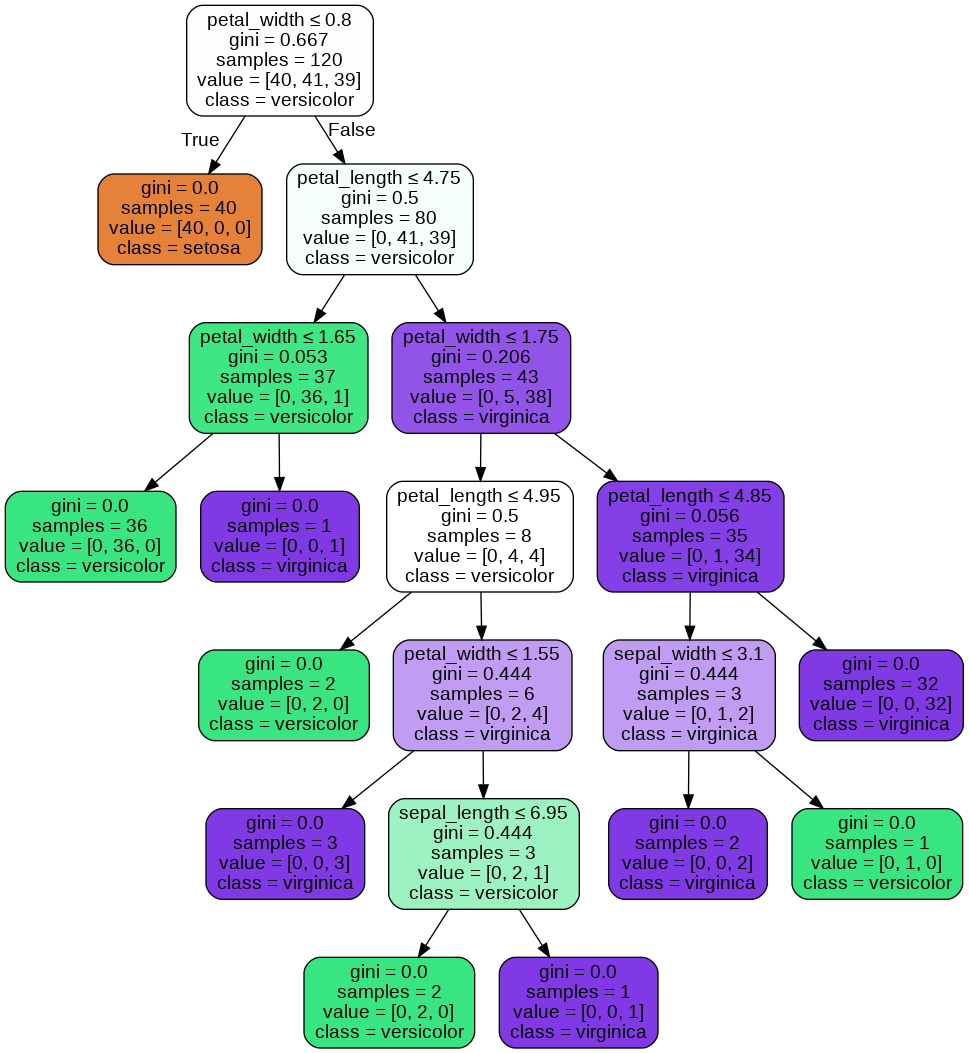

In [0]:
dot_data = StringIO()
export_graphviz(
    tree, # obiekt drzewa
    out_file=dot_data, # obiekt, do którego zostanie zapisana definicja grafu
    filled=True, # styl grafu: wypełnione węzły
    rounded=True, # styl grafu: zaokrąglone węzły
    special_characters=True, # styl grafu: poprawne symbole matematyczne
    feature_names=iris_feature_names, # nazwy cech w zbiorze
    class_names=iris_class_names # nazwy przewidywanych klas
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 4.7 Przechowywanie modeli

In [0]:
import pickle

Przy korzystaniu z modeli potrzebujemy zapisać również kroki przetwarzania wstępnego, np. obiekt **LabelEncoder**.

In [0]:
model = (encoder, tree)

In [0]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [0]:
with open("model.pkl", "rb") as model_file:
    unpickled_model = pickle.load(model_file)
    unpickled_model

In [0]:
encoder, tree = unpickled_model

# Zadania do wykonania

1. Wczytaj zbiór Titanic i dokonaj preprocessingu:
  *   usuń niepotrzebne kolumny
  *   przetransformuj cechę płci na wartości binarne 0/1
  *   podziel zbiór na wektory cech (`X`) i wartości docelowe klas (`y`)
  *  podziel zbiór na podzbiór uczący (80%) i testowy (20%)
2. Naucz model drzewa decyzyjnego przy użyciu zbioru uczącego
3. Sprawdź jakość uzyskanego modelu na zbiorze testowym
4. Zwizualizuj drzewo decyzyjne
5. Zapisz modele przy pomocy `pickle`
6. (Opcjonalnie) Sprawdź jak wartości hiperparametrów wpływają na budowanie drzewa decyzyjnego